In [ ]:
#Sample urls:
#www.lifehacks-gaming.com
#https://timesofindia.indiatimes.com/india/in-big-push-for-drone-use-government-eases-norms/articleshow/84459932.cms

**Importing required libraries**

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Extracting image from webpage & saving them in a folder**

In [5]:
from bs4 import *
import requests
import os

# CREATE FOLDER
def folder_create(images):
    try:
        global folder_name
        folder_name = input("Enter Folder Name:- ")
        # folder creation
        os.mkdir(folder_name)

    # if folder exists with that name, ask another name
    except:
        print("Folder Exist with that name!")
        folder_create()

    # image downloading start
    download_images(images, folder_name)


# DOWNLOAD ALL IMAGES FROM THAT URL
def download_images(images, folder_name):

    # intitial count is zero
    count = 0

    # print total images found in URL
    print(f"Total {len(images)} Image Found!")

    # checking if images is not zero
    if len(images) != 0:
        for i, image in enumerate(images):
            # From image tag ,Fetch image Source URL

                        # 1.data-srcset
                        # 2.data-src
                        # 3.data-fallback-src
                        # 4.src

            # Here we will use exception handling

            # first we will search for "data-srcset" in img tag
            try:
                # In image tag ,searching for "data-srcset"
                image_link = image["data-srcset"]

            # then we will search for "data-src" in img
            # tag and so on..
            except:
                try:
                    # In image tag ,searching for "data-src"
                    image_link = image["data-src"]
                except:
                    try:
                        # In image tag ,searching for "data-fallback-src"
                        image_link = image["data-fallback-src"]
                    except:
                        try:
                            # In image tag ,searching for "src"
                            image_link = image["src"]

                        # if no Source URL found
                        except:
                            pass

            # After getting Image Source URL
            # We will try to get the content of image
            try:
                r = requests.get(image_link).content
                try:

                    # possibility of decode
                    r = str(r, 'utf-8')

                except UnicodeDecodeError:

                    # After checking above condition, Image Download start
                    with open(f"{folder_name}/images{i+1}.jpg", "wb+") as f:
                        f.write(r)

                    # counting number of image downloaded
                    count += 1
            except:
                pass

        # There might be possible, that all
        # images not download
        # if all images download
        if count == len(images):
            print("All Images Downloaded!")

        # if all images not download
        else:
            print(f"Total {count} Images Downloaded Out of {len(images)}")

# MAIN FUNCTION START
def main(url):

    # content of URL
    r = requests.get(url)

    # Parse HTML Code
    soup = BeautifulSoup(r.text, 'html.parser')

    # find all images in URL
    images = soup.findAll('img')

    # Call folder create function
    folder_create(images)

In [ ]:
# take url
url = input("Enter URL:- ")

# CALL MAIN FUNCTION
main(url)

In [ ]:
from PIL import Image
import os, sys

path = folder_name + "/"
dirs = os.listdir(path)


**discarding low quality/resolution images**

In [ ]:
for items in dirs:
  img = Image.open(path+items)
  #print(items,os.stat(path+items).st_size)

  #print(img.size,img.size[0])
  if(((os.stat(path+items).st_size)< 2000) or (img.size[0] < 150) or (img.size[1] < 150)):
    os.remove(path+items)
    print("removed image: ",img)

removed image:  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1x1 at 0x7FE595ED0C50>
removed image:  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1x1 at 0x7FE594B5CDD0>
removed image:  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1x1 at 0x7FE595ED0C50>
removed image:  <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1x1 at 0x7FE5935FC510>


In [ ]:
import numpy as np
import cv2
import argparse

In [ ]:
def find_largest_contour(image):
    """
    This function finds all the contours in an image and return the largest
    contour area.
    :param image: a binary image
    """
    image = image.astype(np.uint8)
    contours, hierarchy = cv2.findContours(
        image,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

In [ ]:
from google.colab.patches import cv2_imshow
def show(name, image):
    """
    A simple function to visualize OpenCV images on screen.
    :param name: a string signifying the imshow() window name
    :param image: NumPy image to show
    """
    cv2.imshow(name, image)
    cv2.waitKey(0)

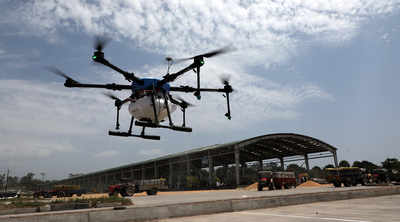

In [ ]:
image = cv2.imread('test1/images6.jpg')
cv2_imshow(image)
# blur the image to smmooth out the edges a bit, also reduces a bit of noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# convert the image to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
# apply thresholding to conver the image to binary format
# after this operation all the pixels below 200 value will be 0...
# and all th pixels above 200 will be 255
ret, gray = cv2.threshold(gray, 200 , 255, cv2.CHAIN_APPROX_NONE)

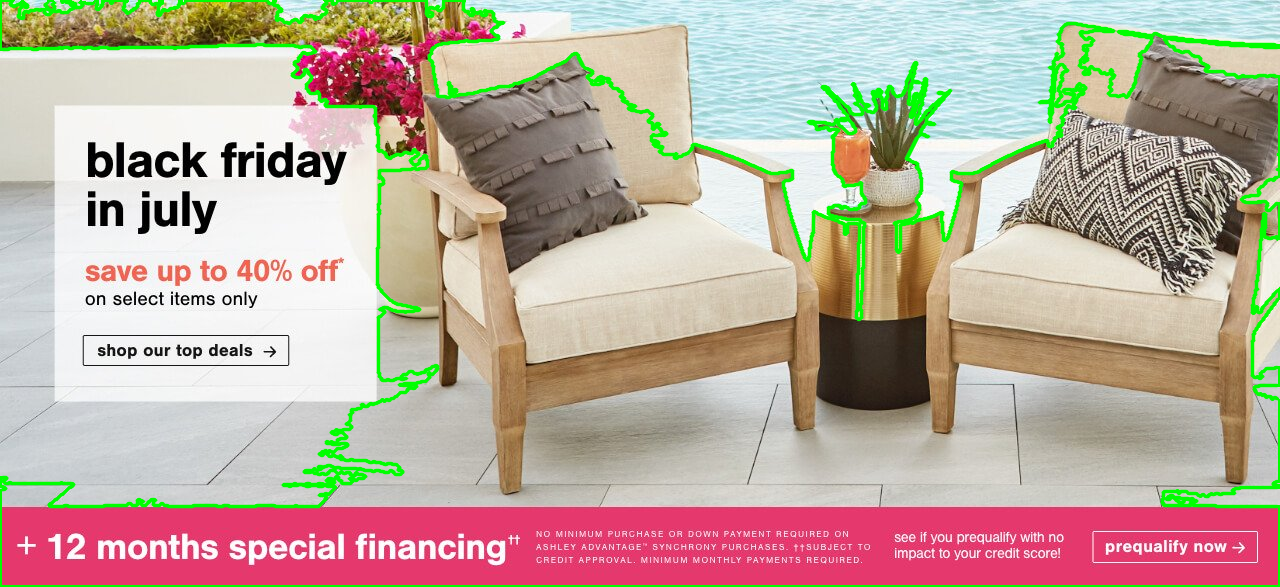

In [ ]:
from google.colab.patches import cv2_imshow
# find the largest contour area in the image
contour = find_largest_contour(gray)
#print(contour)
image_contour = np.copy(image)
cv2.drawContours(image_contour, [contour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)
cv2_imshow(image_contour)

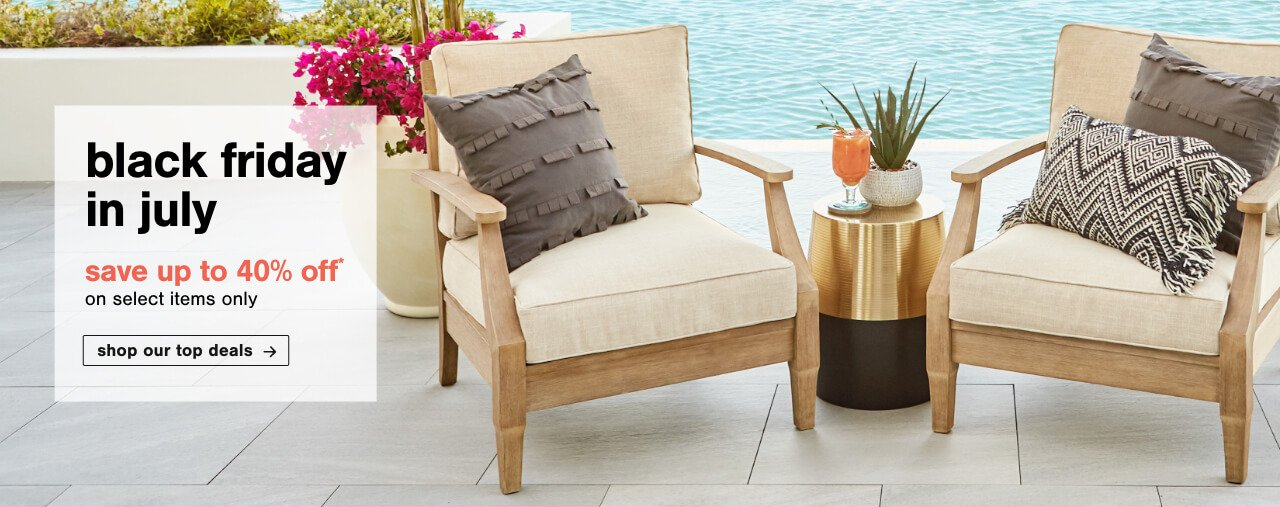

-1

In [ ]:
import cv2

# Load image, convert to grayscale, and find edges
image = cv2.imread('test2/images20.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

# Find contour and sort by contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

cv2_imshow(ROI)
cv2.imwrite('test2/images20_foreground.jpg',ROI)
cv2.waitKey()

**Resizing the image with quality preservation**

In [ ]:
dirs = os.listdir(path)
width = 200
height = 200

In [ ]:
for items in dirs:
  filename = path+items
  image = Image.open(filename)
  image = image.resize((width, height), Image.ANTIALIAS)
  quality_val = 90
  image = image.convert('RGB')
  image.save(filename, 'JPEG', quality=quality_val)

In [ ]:
  image = Image.open('test1/images6_foreground.jpg')
  image = image.resize((width, height), Image.ANTIALIAS)
  quality_val = 90
  image = image.convert('RGB')
  image.save('test1/images6_foreground.jpg', 'JPEG', quality=quality_val)

**De-noising the image**

In [ ]:
def image_denoising(file_path):
  #file_path = input("Enter the image path\n")
  slash_index = file_path.rfind('/')
  if slash_index == -1:
    file_full_name = file_path
  else:
    file_extra_path = file_path[:slash_index]
    file_full_name = file_path[slash_index+1:]

  dot_index = file_full_name.rfind('.')
  file_name = file_full_name[:dot_index]
  file_extension = file_full_name[dot_index+1:]
  input_img = mpimg.imread(file_path)
  output_img = cv2.fastNlMeansDenoisingColored(input_img, None, 10, 10, 7, 21)
  output_file_name = file_name + "_denoised"
  output_file_full_name = output_file_name + '.' + file_extension
  output_file_path = output_file_full_name if slash_index == -1 else file_extra_path + '/' + output_file_full_name
  plt_file_name = file_name + "_plt"
  plt_file_full_name = plt_file_name + '.' + file_extension
  plt_file_path = plt_file_full_name if slash_index == -1 else file_extra_path + '/' + plt_file_full_name
  mpimg.imsave(output_file_path, output_img)

In [ ]:
dirs = os.listdir(path)
for items in dirs:
  image_denoising(path+items)
  #os.remove(path+items) #removing original image and keeping denoised version only

In [ ]:
image_denoising('test1/images6_foreground.jpg')

In [ ]:
#Clear folder
import shutil
shutil.rmtree("test7")

# path = "test5/"
# dirs = os.listdir(path)
# for items in dirs:
#   os.remove(path+items)

In [ ]:
#Reference:
#https://www.geeksforgeeks.org/how-to-download-all-images-from-a-web-page-in-python/
#https://www.researchgate.net/publication/326046049_Principal_texture_direction_based_block_level_image_reordering_and_use_of_color_edge_features_for_application_of_object_based_image_retrieval
#https://www.researchgate.net/figure/Example-of-prominent-object-region-extraction-as-a-foreground-image_fig20_326046049
#https://stackoverflow.com/questions/28759253/how-to-crop-the-internal-area-of-a-contour
#https://debuggercafe.com/image-foreground-extraction-using-opencv-contour-detection/
#https://stackoverflow.com/questions/25552765/python-opencv-second-largest-object
#https://stackoverflow.com/questions/49577973/how-to-crop-the-biggest-object-in-image-with-python-opencv/49579222
https://www.geeksforgeeks.org/how-to-download-all-images-from-a-web-page-in-python/